In [1]:
import numpy as np
X = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])

In [2]:
X

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [3]:
y

array([[ 871],
       [1132],
       [1042],
       [1356],
       [1488],
       [1638],
       [1569],
       [1754],
       [1866],
       [1900]])

In [4]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [5]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [6]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [7]:
y

array([[-1.75751985],
       [-0.98083058],
       [-1.24865447],
       [-0.31424669],
       [ 0.07856167],
       [ 0.52493481],
       [ 0.31960317],
       [ 0.87013004],
       [ 1.20342199],
       [ 1.3045999 ]])

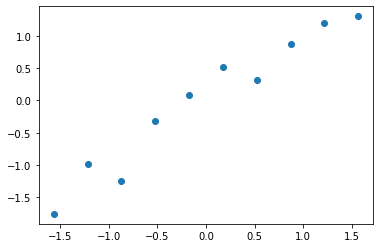

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)

# Fórmula da regressão linear simples
y = b0 + b1 * x

In [9]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [10]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [12]:
erro = tf.losses.mean_squared_error(y, (b0 + b1 * X))
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [13]:
with tf.Session() as sess:
    sess.run(init)
    #print(sess.run(b0))
    #print(sess.run(b1))
    for i in range(1000):
        sess.run(treinamento)
    b0_final, b1_final = sess.run([b0, b1])

In [14]:
b0_final

0.07293496

In [15]:
b1_final

0.9359134

In [16]:
previsoes = b0_final + b1_final * X
previsoes

array([[-1.39335951],
       [-1.06751629],
       [-0.74167308],
       [-0.41582986],
       [-0.08998665],
       [ 0.23585657],
       [ 0.56169979],
       [ 0.887543  ],
       [ 1.21338622],
       [ 1.53922944]])

In [17]:
type(previsoes)

numpy.ndarray

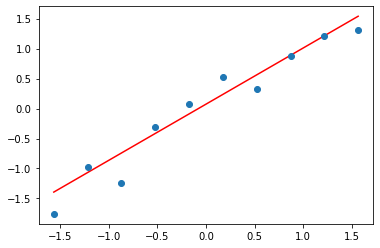

In [18]:
plt.plot(X, previsoes, color = 'red')
plt.plot(X, y, 'o')

In [19]:
scaler_x.transform([[40]])

array([[-0.03481553]])

In [20]:
previsao = scaler_y.inverse_transform(b0_final + b1_final * scaler_x.transform([[40]]))
previsao

array([[1475.15949902]])

In [21]:
y1 = scaler_y.inverse_transform(y)
y1

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1488.],
       [1638.],
       [1569.],
       [1754.],
       [1866.],
       [1900.]])

In [22]:
previsoes1 = scaler_y.inverse_transform(previsoes)
previsoes1

array([[ 993.37306876],
       [1102.86998473],
       [1212.3669007 ],
       [1321.86381666],
       [1431.36073263],
       [1540.8576486 ],
       [1650.35456456],
       [1759.85148053],
       [1869.3483965 ],
       [1978.84531246]])

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y1, previsoes1)
mse = mean_squared_error(y1, previsoes1)

In [24]:
mae

67.9187540892004

In [25]:
mse

7153.912871448908